<a href="https://colab.research.google.com/github/devorahst/Cardiac-Arrest-Visualization/blob/main/DVariable.CODISNDISeligibleProfile/Figure_1_BathedAndTimeElapsed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Set-Up
This notebook creates the figure displaying the relationship between time between the assault and exam and victim bathing. This cell loads in the data and filters it to include only information from female victims and removes cases from site 6.

In [ ]:
#pulls up our SAK dataset
#@title Upload Dataset
file_id = "13DLmmbYXonl9alHR4VobfeTuA_IxlQxZ" #@param {type:"string"}
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  _, done = downloader.next_chunk()

fileId = drive.CreateFile({'id': file_id }) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print(fileId['title'])  
fileId.GetContentFile(fileId['title'])  # Save Drive file as a local file

!pip install -U scikit-learn

from scipy.stats import chi2_contingency
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

with open(fileId['title'], encoding="utf8", errors='ignore') as f:
  df = pd.read_csv(f)

df = df.apply(pd.to_numeric, errors='ignore')
predictedVariable = "CODISNDISeligibleProfile"


#delete rows that don't have a value for CODISNDISeligibleProfile

predictedFeatures = ['CODISNDISeligibleProfile', 'SDISeligibleprofile']  

numericalFeatures = ['Age', 'Timebetweenassaultandexaminhours', 'PainLevel', 'MulitipleSuspectNumber', 
                     'NumberofUnknownresponses', 'NumberAssaultiveActs', 'Numberofphysicalinjuries', 'Numberofgentialinjuries',
                     'NumberOFitemsTested', 'TimeBetweenCollectAndDNAext', 'TimeBetweenSubmissionANDtesting', 'NumberOfswabsQuantMaleDNA',
                     'NumberOfswabsDNAanalysis', 'NumberofSTRDNAloci', 'NumberOFswabsSTRDNAprofile', 'NumberOfYSTRDNAloci']

categoricalFeatures = ['Site', 'EXAMbySANE', 'YearKitCollected', 'KITbroughtTOcrimelab', 'KITlengthofSubmissionTime',
                       'UnderAge18', 'Gender', 'ExamDeclined', 'Noninterview', 'Race', 'PriorHxofSAover14',
                       'PriorHxofSAunder14', 'Student', 'Military', 'Pain', 'PainLocation1','PainLocation2', 
                       'PainLocation3', 'PainLocation4','PainTreatment', 'PermanentAddress', 'CurrentPhysicalmedprob',
                       'MedProbChronic', 'MedProbInfection', 'MedProbBlood', 'MedProbCardiac', 'MedProbEar', 'MedProbEndocrine',
                       'MedProbEye', 'MedProbGI', 'MedProbGU', 'MedProbGYN', 'MedProbImmune', 'MedProbMusculoskeletal', 'MedProbNeurological',
                       'MedProbOral', 'MedProbRenal', 'MedProbRespiratory', 'MedProbSkin', 'MedProbOther', 'Medication',
                       'PsychotropicMEDuse', 'PsychotropicANTIPSYCHOTICSatypical', 'PsychotropicSTIMULANTuse', 'PsychotropicANTIANXIETY', 
                       'PsychotropicANTIDEPRESSANTS', 'PsychotropicANTISEIZUREbipolar', 'PsychotropicADDICTIONmeds','PsychotropicSLEEPaid', 'PsychotropicOTHER', 
                       'PsychotropicANTIPSYCHOTICStypical', 'PolypharmacyPsychMeds', 'ImmunizationstatusTETANUS', 'ReceivedTetanus',
                       'ImmunizationstatusHEP', 'ReceivedHepB', 'Sexualcontactwithin120hours', 'Selfdisclosurementalillness', 'MIdepression',
                       'MIanxiety', 'MIPTSD', 'MIpsychoticDisorders', 'MIadhd', 'MIpersonalitydisorder', 'MIbipolar', 'MIeatingdisorder', 'MIdrugalcoholdisorders', 
                       'MIother', 'SelfDiscolsureMentalillnessORuseofpsychotropics', 'OnlineMeetingOFsuspect', 'Suspectrelationship',
                       'Locationofassault', 'PatientActionScratch', 'PatientActionBite', 'PatientActionHit', 'PatientActionKick', 'PatientActionOther',
                       'Suspectrace', 'SuspectactionVERBAL', 'SuspectactionsGRABBEDHELD', 'SuspectactionsPHYSICALBLOWS', 'SuspectactionsSTRANGLEDCHOKED',
                       'SuspectactionsWEAPON', 'SuspectactionsRESTRAINTS', 'SuspectactionsBURNED', 'MultipleSuspects', 'SuspectedDrugfacilitated',
                       'Patientdruguse', 'PatientETOHuse', 'Suspectdruguse', 'SuspectETOHuse', 'PatientSuspectETOHordrug', 'LossOFconsciousnessORawareness',
                       'OneORmoreunknownanswer', 'Unknownanswerto4ormorequestions', 'UnknownanswertoALL', 'AsleepANDawakenedtoassault', 'MemoryLoss',
                       'LossOfconsciousness', 'DecreasedAwareness', 'TonicImmobility', 'Detachment', 'NOSApatientsVAGINApenis', 'NOSApatientsVAGINAfingerhand',
                       'NOSApatientsVAGINAmouth', 'NOSApatientsVAGINAobject', 'NOSApatientsANUSpenis', 'NOSApatientsANUSfingerhand', 'NOSApatientsANUSmouth', 
                       'NOSApatientsANUSobject', 'NOSApatientsPENISgenitals', 'NOSApatientsPENISfinger', 'NOSApatientsPENISmouth', 'NOSApatientsPENISobject', 
                       'NOSApatientsMOUTHpenis', 'NOSApatientsMOUTHfinger', 'NOSApatientsMOUTHmouth', 'NOSApatientsMOUTHobject', 'SUSPECTmouthcontactGENITALS', 
                       'SUSPECTmouthcontactMOUTH', 'SUSPECTmouthcontactOTHER', 'HANDSofSuspectBreast', 'HANDSofSuspectExtremities', 
                       'HANDSofSuspectOther', 'Ejaculation', 'CONDOMuse', 'LUBRICATIONuse', 'SuspectWASHEDpatient', 'SuspectINJUREDbypatient', 'PostassaultURINATED', 
                       'PostassaultDEFECATED', 'PostassaultDOUCHED', 'PostassaultVOMITED', 'PostassaultGARGLED', 'PostassaultBRUSHEDTEETH', 'PostassaultATEdrank', 
                       'PostassaultBATHED', 'PostassaultGENITALWIPE', 'PostassaultCHANGEDCLOTHING', 'PostassaultREMOVEDInserted', 'PhysicalORmentalimpairment', 'Physicalinjury', 
                       'LPIhead', 'LPIneck', 'LPIbreasts', 'LPIchestback', 'LPIabdomen', 'LPIextremities', 'TPIlaceration', 'TPIecchymosis', 'TPIabrasion', 'TPIredness', 
                       'TPIswelling', 'TPIbruise', 'TPIpetechiae', 'TPIincision', 'TPIavulsion', 'TPIdiscoloredmark', 'TPIpuncturewound', 'TPIfracture', 
                       'TPIbitemark', 'TPIburn', 'TPImissingorbrokenTEETH', 'TPIconjunctivalhemorrhage', 'Genitalinjury', 'LGIinnerthighs', 'LGIclitoralhoodclitoris', 
                       'LGIlabiamajora', 'LGIlabiaminora', 'LGIperiurethraltissueURETHRA', 'LGIperihymenaltissue', 'LGIhymen', 'LGIvagina', 'LGIcervix', 'LGIfossanavicularis', 
                       'LGIposteriorfourchette', 'LGIperineum', 'LGIperineum', 'LGIanalrectal', 'LGIbuttocks', 'LGImalePerianalperineum', 'LGIglanspenis', 'LGIpenileshaft', 
                       'LGImaleURETHRALmeatus', 'LGIscrotum', 'LGItestes', 'LGImaleanus', 'LGImalerectum', 'TGIlaceration', 'TGIecchymosis', 'TGIabrasion', 'TGIredness', 
                       'TGIswelling', 'TGIbruise', 'TGIpetechiae', 'TGIincision', 'TGIavulsion', 'TGIdiscoloredmark', 'TGIpuncturewound', 'ToludineDYEuptake', 'HIVnPEP', 
                       'UQuikcollected', 'Yscreen', 'NumberItemsWITH3cutoff', 'ItemsAnalyzed1', 'ItemsAnalyzed2', 'ItemsAnalyzed3', 'ItemsAnalyzed4', 'ItemsAnalyzed5', 
                       'ItemsAnalyzed6', 'ItemsAnalyzed7', 'ItemsAnalyzed8', 'ItemsAnalyzed9', 'ItemsAnalyzed10', 'TypesOFitemsTested', 'RandomSample20142015', 
                       'YearofDNAextraction', 'LocationOfTesting','DANYfundedSAK', 'DNAKitUsed', 'SerologyDoneBeforeDNA', 'QuantMaleDNAFound', 'QuantMaleSwabLoc1', 
                       'QuantMaleSwabLoc2', 'QuantMaleSwabLoc3', 'QuantMaleSwabLoc4', 'QuantMaleSwabLoc5', 'ProbableSTRDNAprofileOFsuspect', 'ProfileofSTRDNAloci', 'ProbableYSTRDNAprofile', 'ProfileOfYSTRDNAloci', 
                       'SwabLocationYSTRDNA', 'SecondSwabLocationYSTRDNA', 'SwabFromSuspectwithVictimDNA', 'ExcludeSuspect', 'ConsensualPartnerStandardSubmitted', 
                       'STRDNAProbableprofileTYPE', 'CODISprofileHit', 'STRDNAkitUsed', 'SUSPECTmouthcontactBREASTS', 'Swab1LocationSTRDNAprofile', 'Swab2LocationSTRDNAprofile',
                       'Swab3LocationSTRDNAprofile', 'SuspectStandardSubmitted', 'CODISNDISreasons', 'CODISSDISreasons']

#unusedFeatures and stringFeatures are columns that contain data that was relevant to medical professionals and for legal purposes, 
#but that aren't useful for our feature association or for predicting eligibility
unusedFeatures = ['filter_$', 'PainTreatmentYesNo', 'GenderMaleFemale', 'DVsuspect', 'RacePrimaryGroups', 'IPSAcombined', 'STRDNAcompleted', 
                  'PhysicalInjuryNOunknown', 'GenitalInjuryNOunknown']

stringFeatures = ['DeIdentifiedCase', 'Raceother', 'SchoolName', 'MilitaryBranchName', 'AddressIfnotPermanent', 'Currentmedprobtext',
                  'MedProbOtherText', 'Medicationtext', 'Sexualcontactwithin120hoursTYPE', 'SelfdisclosureMItype', 'OnlineMeetingName', 'SuspectrelationshipOTHER',
                  'LocationofassaultOTHER', 'Surfaceofassault', 'PatientActionOtherTEXT', 'SuspectraceOTHER', 'SuspectOTHERactions', 'NOSApatientsVAGINAobjectdescription',
                  'NOSApatientsANUSobjectdescription', 'NOSApatientsPENISobjectdescription', 'NOSApatientsMOUTHobjectdescription', 'EjaculationSITE', 'LUBRICATIONtype',
                  'SuspectINJUREDbypatientexplanation', 'Impairmentdescription', 'UBFSnumber', 'ISPnumber', 'DateSubmittedUBFS', 'DateofDNAextractionReport',
                  'BodySwabLocQuant', 'BodySwabDNAanalysis', 'BodySwabLocationSTRDNA', 'BodySwabYSTRDNA', 'ISPnotes2020', 'UBFSnotes2020', 'UBFSnotes2018', 'SUSPECTmouthcontactOTHERsite', 'UBFSnotes2014']

dummy1 = pd.get_dummies(df['Swab1ToDNAanalysis'])
dummy2 = pd.get_dummies(df['Swab2ToDNAanalysis'])
dummy3 = pd.get_dummies(df['Swab3ToDNAanalysis'])
dummy4 = pd.get_dummies(df['Swab4ToDNAanalysis'])

dummy4['0'] = dummy1['0']
dummy1['11'] = dummy2['11']
dummy3['0'] = dummy1['0']

newDummy = dummy1


newDummy = newDummy.where(newDummy != 0, dummy2)
newDummy = newDummy.where(newDummy != 0, dummy3)
newDummy = newDummy.where(newDummy != 0, dummy4)

# print(newDummy)
df['SwabToDNAanalysisNoquantmaleDNAfound'] = newDummy['0'].astype('category')
df['SwabToDNAanalysisVaginal'] = newDummy['1']
df['SwabToDNAanalysisCervical'] = newDummy['2']
df['SwabToDNAanalysisPerianal'] = newDummy['3']
df['SwabToDNAanalysisRectal'] = newDummy['4']
df['SwabToDNAanalysisOral'] = newDummy['5']
df['SwabToDNAanalysisBody'] = newDummy['6']
df['SwabToDNAanalysisUnderwear'] = newDummy['7']
df['SwabToDNAanalysisOtherClothing'] = newDummy['8']
df['SwabToDNAanalysisBedding'] = newDummy['9']
df['SwabToDNAanalysisCondom'] = newDummy['10']
df['SwabToDNAanalysisTampon'] = newDummy['11']

swabToDNAFeatures = ['SwabToDNAanalysisNoquantmaleDNAfound', 'SwabToDNAanalysisVaginal', 'SwabToDNAanalysisCervical', 'SwabToDNAanalysisPerianal', 'SwabToDNAanalysisRectal', 
                     'SwabToDNAanalysisOral','SwabToDNAanalysisBody', 'SwabToDNAanalysisUnderwear', 'SwabToDNAanalysisOtherClothing', 'SwabToDNAanalysisBedding', 
                     'SwabToDNAanalysisCondom','SwabToDNAanalysisTampon' ]

categoricalFeatures.extend(['SwabToDNAanalysisNoquantmaleDNAfound', 'SwabToDNAanalysisVaginal', 'SwabToDNAanalysisCervical', 'SwabToDNAanalysisPerianal', 'SwabToDNAanalysisRectal', 
                     'SwabToDNAanalysisOral','SwabToDNAanalysisBody', 'SwabToDNAanalysisUnderwear', 'SwabToDNAanalysisOtherClothing', 'SwabToDNAanalysisBedding', 
                     'SwabToDNAanalysisCondom','SwabToDNAanalysisTampon'])

df = df.replace(r'^\s+$', np.nan, regex=True)
df = df.replace({np.nan: "No Response"})
df = df.applymap(str)
df = df[df[predictedVariable] != "No Response"]
df = df[df['Site'] != '6']
df = df[df['Gender'] == '1'] #dataframe containing information from only female respondents


MasterValentine_UpdatedCODIS_Feb12_2021.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,9,301) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#Time Between Assault and Exam and Bathing
The next cells will sort the dataset into bathed/not bathed and group into time groups

##Set-up

###Bathed

In [ ]:
eligible = df[df['CODISNDISeligibleProfile'] != 'No Response']

currentVariable = 'PostassaultBATHED'

bathed = eligible[eligible[currentVariable] == '1']
bathed = bathed[bathed['Timebetweenassaultandexaminhours'] != 'No Response']
bathed['Timebetweenassaultandexaminhours'] = bathed['Timebetweenassaultandexaminhours'].apply(pd.to_numeric, errors='coerce')
bathed = bathed[bathed['Timebetweenassaultandexaminhours'] <= 200]

bathed['CODISNDISeligibleProfile'] = np.where((bathed['CODISNDISeligibleProfile'] == '0'), 'Not Eligible', bathed['CODISNDISeligibleProfile'])
bathed['CODISNDISeligibleProfile'] = np.where((bathed['CODISNDISeligibleProfile'] == '1'), 'Eligible', bathed['CODISNDISeligibleProfile'])

In [ ]:
print(bathed['Timebetweenassaultandexaminhours'].max())

199.5


In [ ]:
#Split age groups into buckets
eligibleBathed = {}
numEB = []

timeHolder = 0
day = 0
while timeHolder < 120:
  currentGroup = bathed[(bathed['Timebetweenassaultandexaminhours'] >= timeHolder) & (bathed['Timebetweenassaultandexaminhours'] < timeHolder + 24)]
  numEB.append(len(currentGroup))
  eligibleBathed[day] = ((len(currentGroup[currentGroup['CODISNDISeligibleProfile'] == 'Eligible']) / len(currentGroup)) * 100)

  timeHolder += 24
  day += 1

currentGroup = bathed[(bathed['Timebetweenassaultandexaminhours'] >= timeHolder)]

numEB.append(len(currentGroup))
eligibleBathed["5+"] = ((len(currentGroup[currentGroup['CODISNDISeligibleProfile'] == 'Eligible']) / len(currentGroup)) * 100)

timeHolder += 24
day += 1

###Not Bathed

In [ ]:
eligible = df[df['CODISNDISeligibleProfile'] != 'No Response']
currentVariable = 'PostassaultBATHED'
notBathed = eligible[eligible[currentVariable] == '0']
notBathed = notBathed[notBathed['Timebetweenassaultandexaminhours'] != 'No Response']
notBathed['Timebetweenassaultandexaminhours'] = notBathed['Timebetweenassaultandexaminhours'].apply(pd.to_numeric, errors='coerce')
notBathed = notBathed[notBathed['Timebetweenassaultandexaminhours'] <= 200]

notBathed['CODISNDISeligibleProfile'] = np.where((notBathed['CODISNDISeligibleProfile'] == '0'), 'Not Eligible', notBathed['CODISNDISeligibleProfile'])
notBathed['CODISNDISeligibleProfile'] = np.where((notBathed['CODISNDISeligibleProfile'] == '1'), 'Eligible', notBathed['CODISNDISeligibleProfile'])

In [ ]:
print(notBathed['Timebetweenassaultandexaminhours'].max())

173.0


In [ ]:
#Split age groups into buckets
eligibleNotBathed = {}
numNB = []

timeHolder = 0
day = 0
while timeHolder < 120:
  currentGroup = notBathed[(notBathed['Timebetweenassaultandexaminhours'] >= timeHolder) & (notBathed['Timebetweenassaultandexaminhours'] < timeHolder + 24)]
  numNB.append(len(currentGroup))
  eligibleNotBathed[day] = ((len(currentGroup[currentGroup['CODISNDISeligibleProfile'] == 'Eligible']) / len(currentGroup)) * 100)

  timeHolder += 24
  day += 1
 
currentGroup = notBathed[(notBathed['Timebetweenassaultandexaminhours'] >= timeHolder)]
numNB.append(len(currentGroup))
eligibleNotBathed["5+"] = ((len(currentGroup[currentGroup['CODISNDISeligibleProfile'] == 'Eligible']) / len(currentGroup)) * 100)

timeHolder += 24
day += 1

##Plot
This cell creates the lineplot showing time between assault and exam, bathing, and CODIS eligibility.

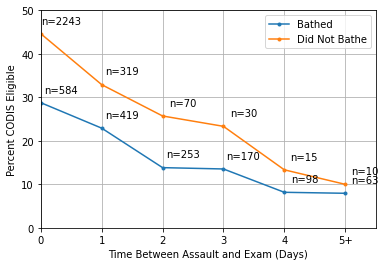

In [ ]:
timeGroupBathed = list(eligibleBathed.keys())         
numEligibleBathed = list(eligibleBathed.values())

timeGroupNotBathed = list(eligibleNotBathed.keys())         
numEligibleNotBathed = list(eligibleNotBathed.values())

# print(numEligible)

import matplotlib.pyplot as plt
import numpy as np


plt.plot(timeGroupBathed, numEligibleBathed, label='Bathed', marker='.')
plt.plot(timeGroupNotBathed, numEligibleNotBathed, label='Did Not Bathe', marker='.')

plt.xlabel("Time Between Assault and Exam (Days)")
plt.ylabel("Percent CODIS Eligible");
plt.legend()
plt.grid(b=True)
# plt.plot(timeGroupBathed, numEligibleBathed, marker='.')
# plt.plot(timeGroupNotBathed, numEligibleNotBathed, marker='.')


i = 0
for x in eligibleBathed:
    y = eligibleBathed[x]

    label = "n=" + str(numEB[i])
    i += 1
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(20,10), # distance from text to points (x,y)
                 ha='center')

i = 0
for x in eligibleNotBathed:
    y = eligibleNotBathed[x]

    label = "n=" + str(numNB[i])
    i += 1
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(20,10), # distance from text to points (x,y)
                 ha='center')
plt.ylim([0, 50])
plt.xlim([0, 5.5])

plt.savefig('bathing_and_time_lineplot.pdf', dpi=600)
plt.show()